# __Kenyan Swahili Speech Emotion Recognition System__ 

### Researchers
1. Ian Korir - Group Leader
2. Hellen Samuel 
3. Gregory Mikuro 
4. Doreen Wanjiru
5. Esther Francis - Scrum Master

### Facilitator
Nikita Njoroge - Technical Mentor

## **1.0 Business Understanding**

### **1.1 Introduction**
In today’s customer service landscape, understanding and responding to customer emotions effectively can be a key differentiator for businesses. By integrating Speech Emotion Recognition (SER) technology into customer service call centers, companies can enhance the quality of interactions, tailoring responses to meet the emotional needs of customers. This project focuses on developing an SER model specifically designed to recognize emotions in Kenyan Swahili speech, thereby addressing a significant gap in existing emotion AI technologies and offering a tailored solution for the Kenyan market.

### **1.2 Background**
Customer service call centers often serve as the first point of contact between a company and its customers. In these interactions, understanding the emotional state of the customer can be crucial for delivering effective and empathetic service. However, existing SER systems are predominantly designed for languages like English and may not perform well with Swahili, the most widely spoken language in Kenya. Given the unique phonetic and prosodic characteristics of Swahili, there is a clear need for a localized SER model. This project aims to address this need by developing an SER model that can accurately classify emotions in Swahili speech, specifically within the context of customer service call centers.

### **1.3 Research Problem**
Customer service call centers in Kenya face challenges in effectively understanding and responding to customer emotions due to the lack of SER systems tailored to Swahili. This gap limits the ability of service agents to provide personalized and emotionally intelligent responses, which can negatively impact customer satisfaction and overall service quality. By focusing on the development of a Swahili-specific SER model, this project seeks to enhance the capability of call centers to manage customer interactions more effectively, ultimately improving the customer experience.

### **1.4 Problem Statement**
The absence of a robust, Swahili-specific Speech Emotion Recognition (SER) model hinders the ability of customer service call centers in Kenya to accurately detect and respond to customer emotions. This limitation can lead to suboptimal customer interactions and reduced satisfaction levels. Therefore, this project aims to develop an emotion recognition model tailored to the linguistic and cultural nuances of Kenyan Swahili, enabling more effective and empathetic customer service interactions in call centers.

### **1.5 Objectives**
1. **Data Collection and Preprocessing**: Collect, preprocess, and annotate a diverse dataset of Kenyan Swahili audio samples for five target emotions: Anger, Happiness, Sadness, Calmness, and Surprise.
2. **Acoustic Feature Analysis**: Extract and analyze acoustic features from the collected Swahili samples, examining relationships between these features and the corresponding emotions.
3. **Feature Selection and Data Augmentation**: Develop a feature selection methodology tailored to Swahili speech patterns and implement data augmentation techniques to enhance the diversity and robustness of the dataset.
4. **Model Development and Deployment**: Create and deploy a deep neural network-based classification model with a target accuracy of at least 80% for emotion recognition in Kenyan Swahili speech.


The key business driver is to enhance customer service quality by enabling real-time emotion detection, which can be used to optimize customer interactions, improve agent performance, and increase overall customer satisfaction.


### **1.6 Stakeholder**

## **2.0 Data Understanding**

### **2.1 Methodology**
The dataset for this project was collected from 240 participants, ensuring a balanced representation of gender (male and female) and the five target emotions (Anger, Happiness, Sadness, Calmness, and Surprise). Participants were volunteers who contributed Swahili speech samples reflecting these emotions in controlled settings to ensure consistency in the data collection process. The methodology also considered variations in speaker accents and dialects to enhance the model’s generalization capability.

### **2.2 Structure**
The dataset was structured to ensure a balanced distribution of speech samples across the five emotions and the two gender categories. This balanced structure is crucial for developing a model that performs well across different demographic groups and emotional states. Each participant provided multiple samples for each emotion, resulting in a comprehensive dataset that captures the nuances of Swahili speech across different emotional contexts. The collected data was systematically organized and labeled, facilitating efficient preprocessing and feature extraction in subsequent phases of the project.

## __3.0 Modeling__ 

### __3.1 Data Preprocessing__

In our approach to processing and managing audio data for emotion recognition, we implemented a multi-step pipeline involving data loading, cleaning, preprocessing, feature extraction, and finally, data saving and splitting. Here’s a breakdown of the strategy and the reasoning behind each step:

#### 3.1.1 **Data Loading**

**Process**: We first load the audio data from a specified directory where the data is organized by emotion labels. For each emotion, we retrieve the audio files and store the audio data in an array.

**Reasoning**: 
- **Organization and Access**: We structured the data based on emotion categories to facilitate easy retrieval and management. This allows us to handle data more systematically and apply operations specific to each emotion.
- **Storage**: We use lists to store the raw audio data and corresponding labels, which makes it straightforward to process and access later.

#### 3.1.2 **Data Cleaning**

**Process**: After loading the audio files, we clean the data by applying noise reduction and trimming silence from the audio clips.

**Reasoning**:
- **Noise Reduction**: By reducing noise, we improve the quality of the audio, which can enhance the accuracy of subsequent feature extraction and emotion classification. This step helps in mitigating any distortions that might interfere with the analysis.
- **Silence Trimming**: Removing silence helps in focusing on the relevant parts of the audio, which can be crucial for training models that rely on the actual content of the audio rather than its length or non-informative parts.

#### 3.1.3 **Audio Preprocessing**

**Process**: We pad or truncate the audio data to a fixed length to ensure consistency across all samples.

**Reasoning**:
- **Consistency**: Uniform length for all audio samples is essential for training machine learning models, as it ensures that the input features are consistent. Padding short samples and truncating long ones standardizes the input size and simplifies further processing.

#### 3.1.4 **Feature Extraction**

**Process**: We extract Mel-Frequency Cepstral Coefficients (MFCCs) from the audio data. MFCCs are used to represent the audio signals in a way that captures the essential characteristics for emotion recognition.

**Reasoning**:
- **Feature Representation**: MFCCs are commonly used features in audio processing because they effectively capture the spectral properties of the audio signal, which are crucial for distinguishing between different emotions.
- **Dimensionality Reduction**: By averaging MFCCs across time, we reduce the dimensionality of the data while preserving the most relevant features, making it easier to train machine learning models.

#### 3.1.5 **Data Saving**

**Process**: We save the processed features and labels into CSV and NumPy files. This step also involves splitting the data into training, validation, and test sets.

**Reasoning**:
- **Persistence**: Saving the processed data ensures that we can reuse it without having to repeat the preprocessing steps. This is time-efficient and allows us to maintain consistency across different runs.
- **Data Splitting**: Splitting the data into training, validation, and test sets is crucial for evaluating the performance of our models. It ensures that the models are trained on one subset, validated on another, and tested on a separate, unseen subset.



In [9]:
# Importing the Classes from main.py
from main import DataLoader, DataCleaner, AudioPreprocessor, FeatureExtractor, EmotionLabeler, DataSaver, Modeling, TrainingWithCallbacks, Evaluation

In [10]:
data_dir = "data"
emotions = ["sad", "happy", "angry", "calm", "surprised"]
sample_rate = 16000  
audio_preprocessor = AudioPreprocessor(data_dir, emotions, sample_rate, verbose=False)
X_processed, y_processed = audio_preprocessor.get_data()

# Initialize DataSaver class
data_saver = DataSaver(data_dir, emotions, sample_rate, verbose=False)
# Process, save, and split the data
data_saver.save_to_csv()  # Save to CSV
X_train, X_val, X_test, y_train, y_val, y_test = data_saver.split_data()  # Split the data


Data saved to processed_data.csv


### __3.2 Modeling and Evaluation__ 
In our approach to building, training, evaluating, and saving a deep learning model for classification, we have implemented a comprehensive strategy involving several key steps. Here's an explanation of our process and the rationale behind each component:

#### 3.2.1 **Model Building**

**Process**: We define and construct a Sequential model using Keras. The model consists of LSTM layers for capturing temporal dependencies, BatchNormalization for stabilizing training, Dropout layers for regularization, and Dense layers for final classification.

**Reasoning**:
- **LSTM Layers**: We use Long Short-Term Memory (LSTM) layers to handle sequential data effectively. LSTMs are designed to remember long-term dependencies, which is crucial for analyzing time-series or sequential data.
- **BatchNormalization**: This helps in normalizing the activations of the previous layer and stabilizes the learning process by reducing internal covariate shift.
- **Dropout**: Dropout layers are used to prevent overfitting by randomly setting a fraction of input units to zero during training.
- **Dense Layers**: Finally, Dense layers with a softmax activation function are used to produce probabilities for each class, which is suitable for multi-class classification tasks.

#### 3.2.2 **Model Compilation**

**Process**: We compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy as a metric.

**Reasoning**:
- **Optimizer**: Adam is an adaptive learning rate optimizer that combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp. It is efficient and works well in practice for many problems.
- **Loss Function**: Sparse categorical crossentropy is used because our labels are integers and we want to calculate the loss based on the probability distribution over multiple classes.
- **Metric**: Accuracy is a straightforward metric to evaluate the performance of our classification model.

#### 3.2.3 **Model Training**

**Process**: We train the model using training and validation data, with EarlyStopping and ModelCheckpoint callbacks.

**Reasoning**:
- **EarlyStopping**: This prevents overfitting by stopping the training process once the validation loss stops improving. It also restores the model to the best state observed during training.
- **ModelCheckpoint**: This saves the model’s weights to a file whenever an improvement in validation loss is observed, ensuring that we have the best performing model saved.

#### 3.2.4 **Model Evaluation**

**Process**: After training, we evaluate the model on test data to obtain loss and accuracy metrics.

**Reasoning**:
- **Evaluation**: Testing the model on unseen data provides an estimate of how well it generalizes to new, real-world data. This helps in understanding the model’s performance and reliability.

#### 3.2.5 **Plotting Training History**

**Process**: We visualize the training and validation accuracy and loss over epochs.

**Reasoning**:
- **Visual Analysis**: Plotting these metrics helps in understanding the training dynamics, identifying overfitting or underfitting, and assessing whether the model needs further tuning or additional data.

#### 3.2.6 **Confusion Matrix and Classification Report**

**Process**: We generate a confusion matrix and a classification report to evaluate model performance in detail.

**Reasoning**:
- **Confusion Matrix**: This visualizes the true vs. predicted classifications and helps in understanding where the model might be confusing different classes.
- **Classification Report**: Provides detailed metrics like precision, recall, and F1 score for each class, offering a comprehensive evaluation of model performance.

#### 3.2.7 **Model Saving**

**Process**: We save the trained model to a file for future use.

**Reasoning**:
- **Persistence**: Saving the model ensures that we can reuse it without retraining. This is efficient and allows for deployment or further analysis later.

### KNN

Test Accuracy: 0.7777777777777778


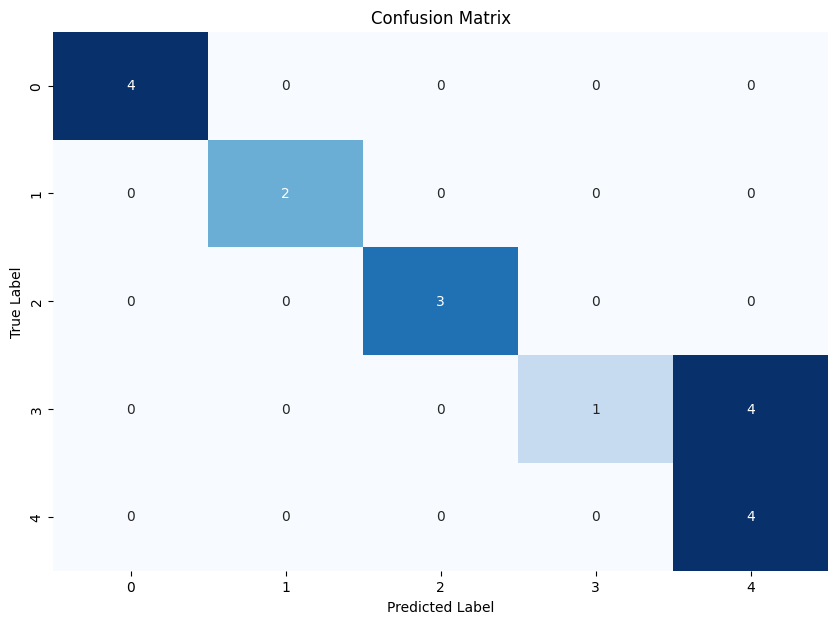

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.20      0.33         5
           4       0.50      1.00      0.67         4

    accuracy                           0.78        18
   macro avg       0.90      0.84      0.80        18
weighted avg       0.89      0.78      0.74        18



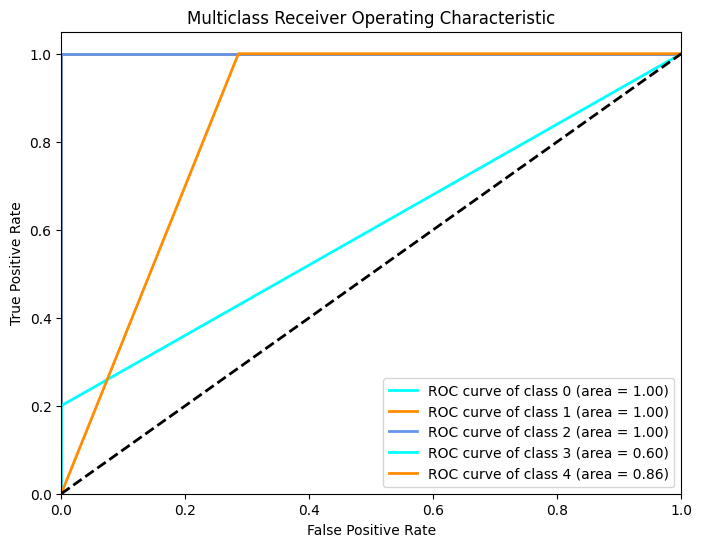

No training history available for non-neural network models.
Feature importance not available for knn.


In [11]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='knn', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)


### Random Forest 

Test Accuracy: 1.0


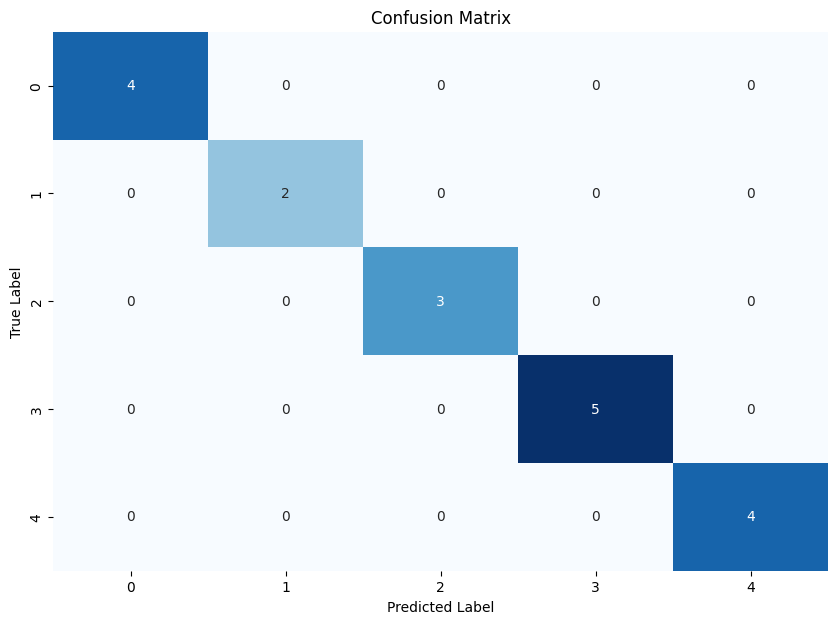

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



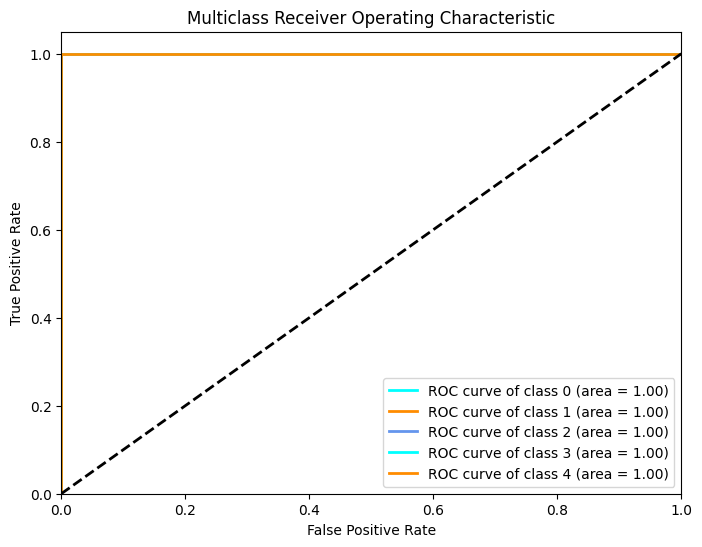

No training history available for non-neural network models.


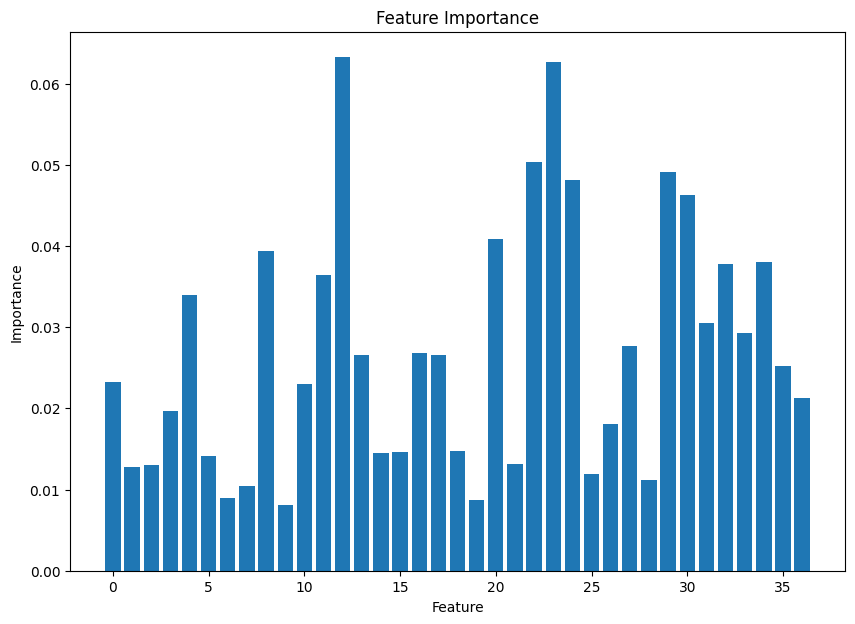

In [12]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='random_forest', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)


### XGBoost

Test Accuracy: 1.0


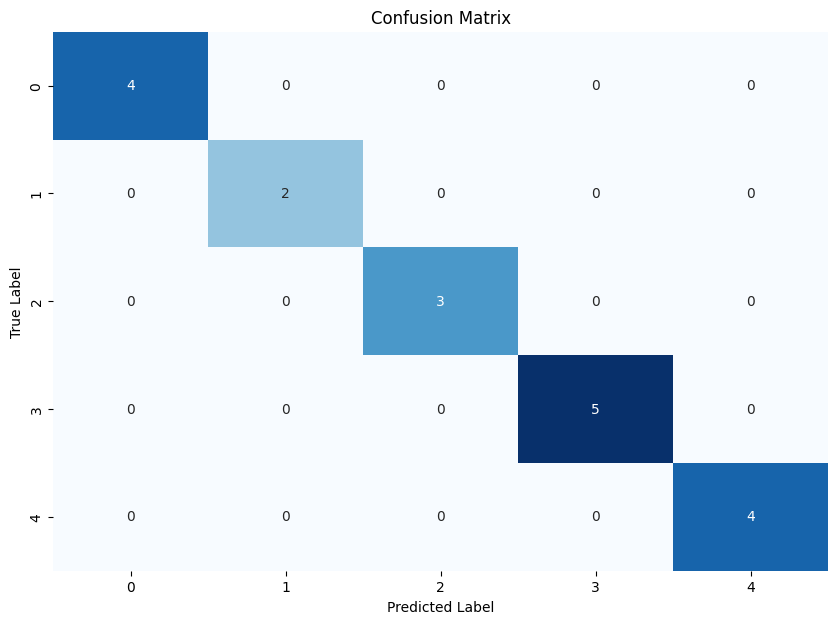

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



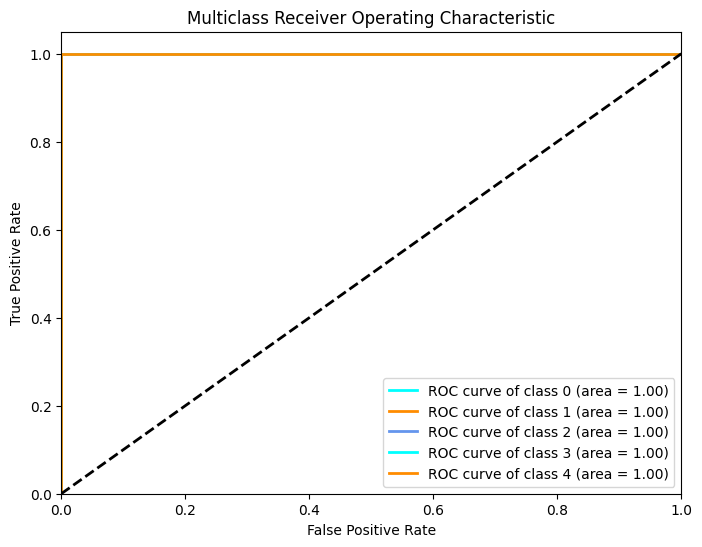

No training history available for non-neural network models.


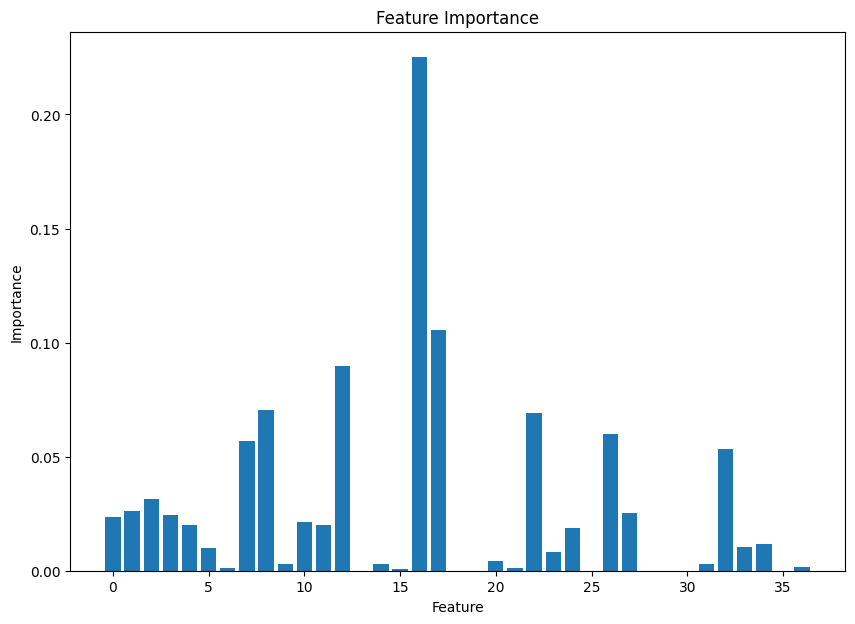

In [13]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='xgboost', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)


### SVM

Test Accuracy: 0.3888888888888889


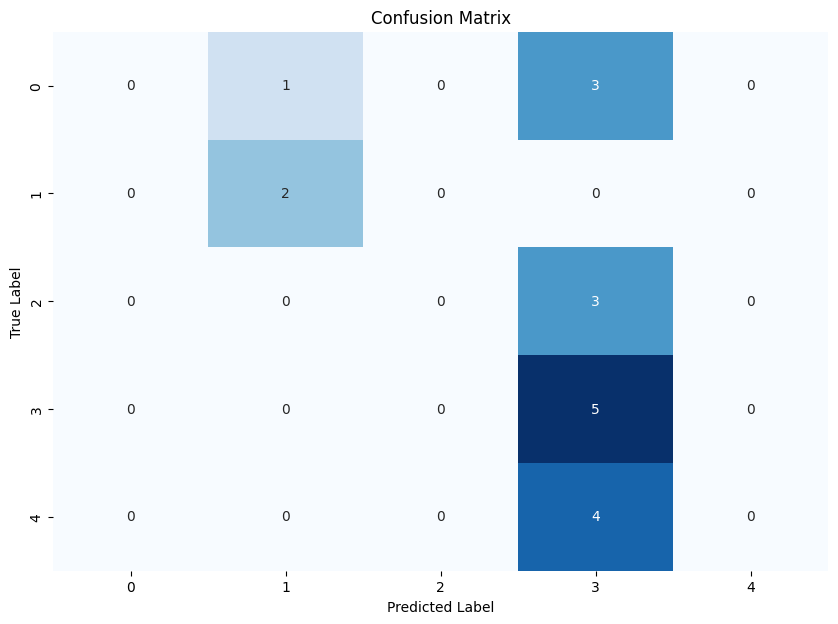

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         3
           3       0.33      1.00      0.50         5
           4       0.00      0.00      0.00         4

    accuracy                           0.39        18
   macro avg       0.20      0.40      0.26        18
weighted avg       0.17      0.39      0.23        18



t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


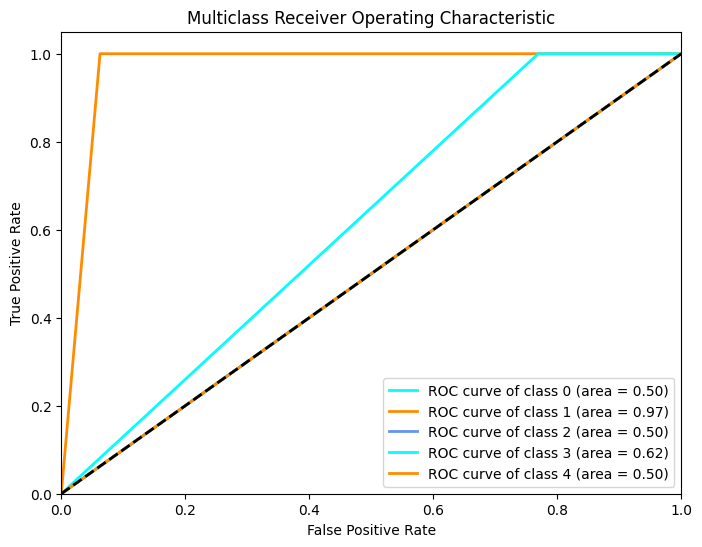

No training history available for non-neural network models.
Feature importance not available for svm.


In [14]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='svm', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)


### Catboost

Test Accuracy: 1.0


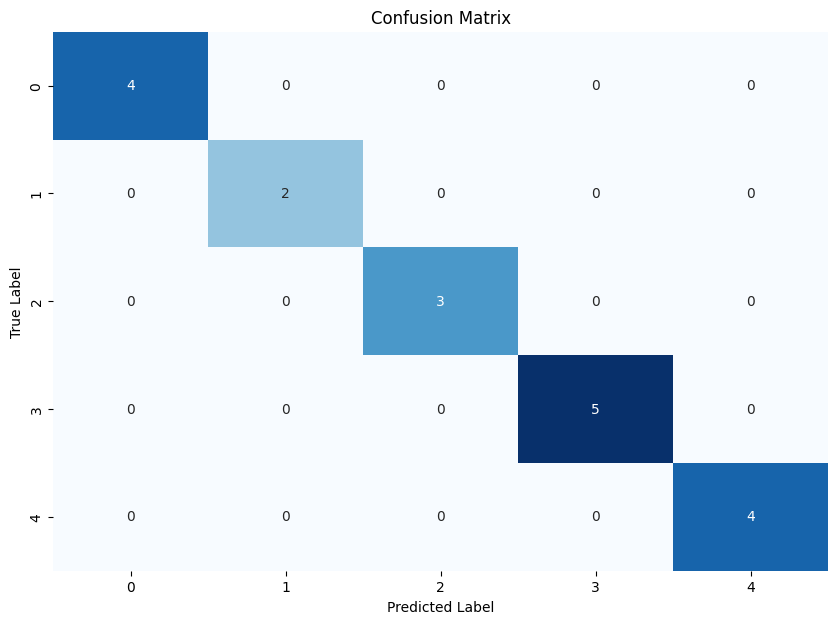

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



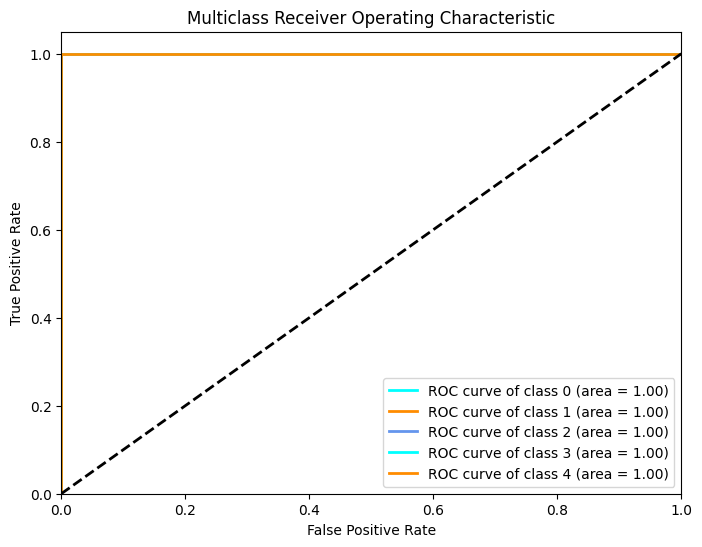

No training history available for non-neural network models.


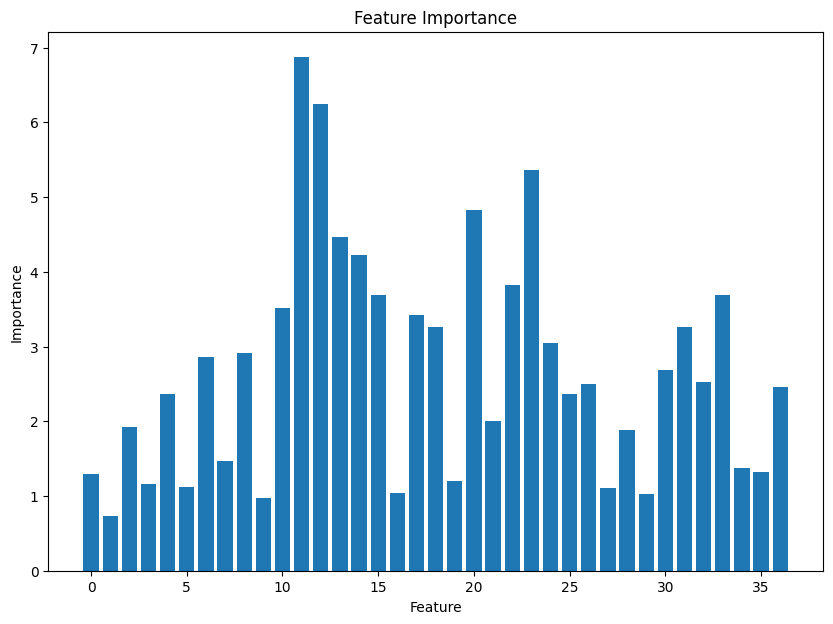

In [15]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='catboost', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)


### MLP

Test Accuracy: 0.2222222222222222


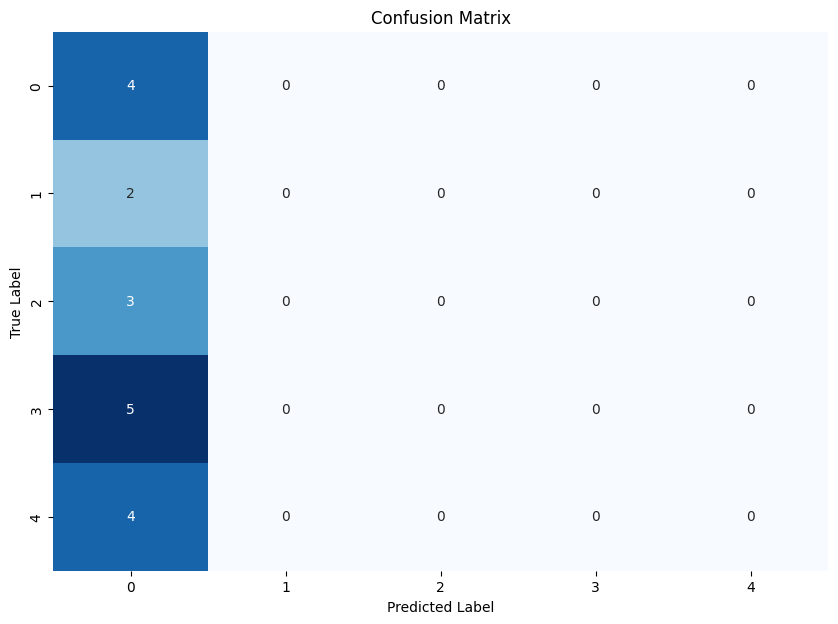

Classification Report:
              precision    recall  f1-score   support

           0       0.22      1.00      0.36         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4

    accuracy                           0.22        18
   macro avg       0.04      0.20      0.07        18
weighted avg       0.05      0.22      0.08        18



t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


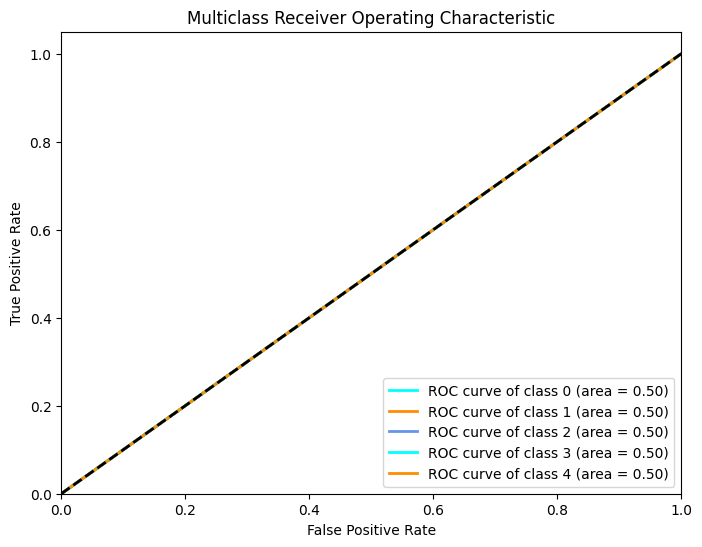

No training history available for non-neural network models.
Feature importance not available for mlp.


In [16]:
# Initialize the Evaluation class with appropriate parameters
modeling = Evaluation(model_name='mlp', input_shape=X_train.shape[1:], num_classes=len(emotions))

# Build, compile, and train the model
modeling.build_model()
history = modeling.train_model(X_train, y_train, X_val, y_val)

# Evaluate the model and generate plots
accuracy = modeling.evaluate_and_plot(X_test, y_test)
